In [1]:
# Change all the "game" to whichever file you want to preprocess and save as

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [4]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,1596310,0,0,KeytoneKiller,76,10,1,17.5,"November 3, 2022",balls
1,1596310,0,0,Wolfeither,20,2,-1,11.2,"November 3, 2022",This game is not complex from my point of view...
2,1596310,0,0,marc801_,153,7,-1,1.6,"October 25, 2022",buggy mess and everything is client sided in m...
3,1596310,1,1,u2argy,28,1,-1,1.5,"October 25, 2022",buggy mess. everything is on the client side o...
4,1596310,1,1,BranAkaBran,607,32,-1,0.5,"October 25, 2022","Full of glitches, no private multiplayer. Bord..."


In [5]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [6]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [7]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,17.5,"November 3, 2022",balls
1,0,0,-1,11.2,"November 3, 2022",This game is not complex from my point of view...
2,0,0,-1,1.6,"October 25, 2022",buggy mess and everything is client sided in m...
3,1,1,-1,1.5,"October 25, 2022",buggy mess. everything is on the client side o...
4,1,1,-1,0.5,"October 25, 2022","Full of glitches, no private multiplayer. Bord..."


In [8]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [9]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"November 3, 2022",balls,0,0,17.5,1
1,"November 3, 2022",This game is not complex from my point of view...,0,0,11.2,-1
2,"October 25, 2022",buggy mess and everything is client sided in m...,0,0,1.6,-1
3,"October 25, 2022",buggy mess. everything is on the client side o...,1,1,1.5,-1
4,"October 25, 2022","Full of glitches, no private multiplayer. Bord...",1,1,0.5,-1
5,"October 24, 2022",miney,0,0,20.4,1
6,"October 24, 2022",fun but i cant move my mouse without dragging ...,0,0,4.4,-1
7,"October 23, 2022",gay,3,3,0.6,1
8,"October 15, 2022",terrible game the owner nor devs actually care...,4,1,6.3,-1
9,"October 15, 2022","This game is great, if you are into crypto min...",0,0,7.3,1


In [10]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [11]:
import datetime as dt

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  274 non-null    object 
 1   Review_Text     274 non-null    object 
 2   Num_Helpful     274 non-null    int64  
 3   Num_Funny       274 non-null    int64  
 4   Hours_Played    274 non-null    float64
 5   Recommend       274 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 13.0+ KB


In [13]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_22540/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"November 3, 2022",balls,0,0,17.5,1,1667433600
1,"November 3, 2022",This game is not complex from my point of view...,0,0,11.2,-1,1667433600
2,"October 25, 2022",buggy mess and everything is client sided in m...,0,0,1.6,-1,1666656000
3,"October 25, 2022",buggy mess. everything is on the client side o...,1,1,1.5,-1,1666656000
4,"October 25, 2022","Full of glitches, no private multiplayer. Bord...",1,1,0.5,-1,1666656000


In [14]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_22540/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 3, 2022",balls,0,0,17.5,1,1667433600,2757
1,"November 3, 2022",This game is not complex from my point of view...,0,0,11.2,-1,1667433600,2757
2,"October 25, 2022",buggy mess and everything is client sided in m...,0,0,1.6,-1,1666656000,2755
3,"October 25, 2022",buggy mess. everything is on the client side o...,1,1,1.5,-1,1666656000,2755
4,"October 25, 2022","Full of glitches, no private multiplayer. Bord...",1,1,0.5,-1,1666656000,2755


In [15]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 3, 2022",balls,0,0,17.5,1,1667433600,2757
1,"November 3, 2022",This game is not complex from my point of view...,0,0,11.2,-1,1667433600,2757
2,"October 25, 2022",buggy mess and everything is client sided in m...,0,0,1.6,-1,1666656000,2755
3,"October 25, 2022",buggy mess. everything is on the client side o...,1,1,1.5,-1,1666656000,2755
4,"October 25, 2022","Full of glitches, no private multiplayer. Bord...",1,1,0.5,-1,1666656000,2755


## - Data Aggregation -

### Number of text reviews per day:

In [16]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2757,"November 3, 2022",balls
1,2757,"November 3, 2022",This game is not complex from my point of view...
2,2755,"October 25, 2022",buggy mess and everything is client sided in m...
3,2755,"October 25, 2022",buggy mess. everything is on the client side o...
4,2755,"October 25, 2022","Full of glitches, no private multiplayer. Bord..."


In [17]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2729,"April 24, 2022",18
1,2729,"April 25, 2022",10
2,2729,"April 26, 2022",2
3,2729,"April 27, 2022",5
4,2730,"April 28, 2022",2
...,...,...,...
97,2754,"October 15, 2022",3
98,2755,"October 23, 2022",1
99,2755,"October 24, 2022",2
100,2755,"October 25, 2022",3


<AxesSubplot:>

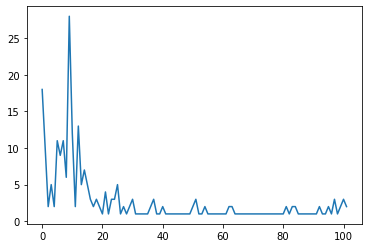

In [18]:
text_days['review_count'].plot()

In [19]:
# total number of text reviews
text_days['review_count'].sum()

274

In [20]:
# average number of text reviews per day
text_days['review_count'].mean()

2.6862745098039214

### Number of text reviews per week:

In [21]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2729,35
1,2730,79
2,2731,35
3,2732,13
4,2733,15
5,2734,10
6,2735,10
7,2736,5
8,2737,3
9,2738,5


<AxesSubplot:>

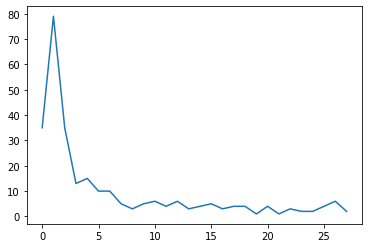

In [22]:
text_weeks['review_count'].plot()

In [23]:
# total number of text reviews
text_weeks['review_count'].sum()

274

In [24]:
# average number of text reviews per week
text_weeks['review_count'].mean()

9.785714285714286

### Num_Helpful per week:

In [25]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 3, 2022",balls,0,0,17.5,1,1667433600,2757
1,"November 3, 2022",This game is not complex from my point of view...,0,0,11.2,-1,1667433600,2757
2,"October 25, 2022",buggy mess and everything is client sided in m...,0,0,1.6,-1,1666656000,2755
3,"October 25, 2022",buggy mess. everything is on the client side o...,1,1,1.5,-1,1666656000,2755
4,"October 25, 2022","Full of glitches, no private multiplayer. Bord...",1,1,0.5,-1,1666656000,2755


In [26]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2729,284
1,2730,585
2,2731,67
3,2732,6
4,2733,15
5,2734,17
6,2735,39
7,2736,1
8,2737,7
9,2738,3


In [27]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2729,48,0,2.0,8.114286
2730,115,0,1.0,7.405063
2731,14,0,1.0,1.914286
2732,2,0,0.0,0.461538
2733,7,0,0.0,1.000000
2734,13,0,0.5,1.700000
2735,16,0,1.5,3.900000
2736,1,0,0.0,0.200000
2737,7,0,0.0,2.333333


In [28]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

1093

In [29]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

3.989051094890511

### Num_Funny per week:

In [30]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2729,84
1,2730,45
2,2731,12
3,2732,0
4,2733,4
5,2734,2
6,2735,4
7,2736,1
8,2737,2
9,2738,0


In [31]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2729,20,0,0.0,2.400000
2730,7,0,0.0,0.569620
2731,6,0,0.0,0.342857
2732,0,0,0.0,0.000000
2733,4,0,0.0,0.266667
2734,1,0,0.0,0.200000
2735,3,0,0.0,0.400000
2736,1,0,0.0,0.200000
2737,2,0,0.0,0.666667


In [32]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

167

In [33]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.6094890510948905

### Hours_Played per week:

In [34]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2729,333.7
1,2730,615.9
2,2731,626.0
3,2732,150.9
4,2733,207.7
5,2734,95.9
6,2735,113.1
7,2736,20.2
8,2737,13.2
9,2738,44.0


In [35]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2729,89.4,0.4,3.60,9.534286
2730,60.5,0.1,5.40,7.796203
2731,219.9,0.1,8.60,17.885714
2732,38.0,0.8,7.70,11.607692
2733,36.2,2.0,9.30,13.846667
2734,24.7,0.1,7.80,9.590000
2735,42.7,0.2,6.00,11.310000
2736,7.2,0.2,4.10,4.040000
2737,7.3,2.3,3.60,4.400000


In [36]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

3234.3

In [37]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

11.804014598540153

### Recommend per week:

In [38]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2729,0.085714
1,2730,0.291139
2,2731,0.371429
3,2732,0.538462
4,2733,0.600000
5,2734,-0.200000
6,2735,0.400000
7,2736,-0.600000
8,2737,0.333333
9,2738,1.000000


In [39]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2729,1,-1,1.0,0.085714
2730,1,-1,1.0,0.291139
2731,1,-1,1.0,0.371429
2732,1,-1,1.0,0.538462
2733,1,-1,1.0,0.600000
2734,1,-1,-1.0,-0.200000
2735,1,-1,1.0,0.400000
2736,1,-1,-1.0,-0.600000
2737,1,-1,1.0,0.333333


In [40]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

52

In [41]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.1897810218978102

## Feature Scaling - Min-Max Normalization

In [42]:
df_min_max_scaled = df.copy()

In [43]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 3, 2022",balls,0,0,17.5,1,1667433600,2757
1,"November 3, 2022",This game is not complex from my point of view...,0,0,11.2,-1,1667433600,2757
2,"October 25, 2022",buggy mess and everything is client sided in m...,0,0,1.6,-1,1666656000,2755
3,"October 25, 2022",buggy mess. everything is on the client side o...,1,1,1.5,-1,1666656000,2755
4,"October 25, 2022","Full of glitches, no private multiplayer. Bord...",1,1,0.5,-1,1666656000,2755


In [44]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 3, 2022",balls,0,0,0.050596,1.0,1.000000,2757
1,"November 3, 2022",This game is not complex from my point of view...,0,0,0.032277,0.0,1.000000,2757
2,"October 25, 2022",buggy mess and everything is client sided in m...,0,0,0.004362,0.0,0.953368,2755
3,"October 25, 2022",buggy mess. everything is on the client side o...,1,1,0.004071,0.0,0.953368,2755
4,"October 25, 2022","Full of glitches, no private multiplayer. Bord...",1,1,0.001163,0.0,0.953368,2755
...,...,...,...,...,...,...,...,...
269,"May 3, 2022","Great gameIt's fun to play, It does have a few...",1,0,0.025007,1.0,0.046632,2730
270,"May 3, 2022","Not worth the money. Still a lot to improve, t...",1,1,0.007851,0.0,0.046632,2730
271,"May 3, 2022",Save problem has improved but fps drops instan...,0,0,0.027915,1.0,0.046632,2730
272,"May 3, 2022",gud,1,0,0.028206,1.0,0.046632,2730


In [45]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [46]:
pd.set_option('display.max_rows', None)

In [47]:
df_sorted = df_sorted.reset_index(drop=True)

In [48]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_22540/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [50]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 3, 2022",balls,0,0,0.050596,1.0,1.000000,2757
1,"November 3, 2022",This game is not complex from my point of view...,0,0,0.032277,0.0,1.000000,2757
2,"October 25, 2022",buggy mess and everything is client sided in m...,0,0,0.004362,0.0,0.953368,2755
3,"October 25, 2022","Full of glitches, no private multiplayer. Bord...",1,1,0.001163,0.0,0.953368,2755
4,"October 25, 2022",buggy mess. everything is on the client side o...,1,1,0.004071,0.0,0.953368,2755
5,"October 24, 2022",miney,0,0,0.059029,1.0,0.948187,2755
6,"October 24, 2022",fun but i cant move my mouse without dragging ...,0,0,0.012504,0.0,0.948187,2755
7,"October 23, 2022",gay,3,3,0.001454,1.0,0.943005,2755
8,"October 15, 2022","This game is great, if you are into crypto min...",0,0,0.020936,1.0,0.901554,2754
9,"October 15, 2022",,0,0,0.021518,1.0,0.901554,2754


In [51]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [52]:
df_text_list

Date_Epoch_Week
2729    [nice game, Games feels unfinished., nice game...
2730    [I like it but it needs time to get better wit...
2731    [it gud, cool game get repetitive after a whil...
2732    [This game is still VERY buggy, but it's clear...
2733    [As good as the beginning of this game is and ...
2734    [Decent game, Few bugs, Should add a Snapping ...
2735    [a lot of bugs, I keep buying a case and it co...
2736    [looks cool and fun its just not my type of ga...
2737    [I feel like this game can be so much better i...
2738    [only bad thing about this is the temp of my o...
2739    [Fun, Good game just needs more content and le...
2740    [love it, i wouldent buy this game right now o...
2741    [TL:DR: not worth, aimless game. The content i...
2742    [Dead game, literally a pump and dump., Abando...
2743    [ok so, this game feels like its in Early Acce...
2744    [Abandoned game, devs don't make updates anymo...
2745    [Game boring and fullfilled after 1 day nothin..

In [53]:
# storing data in JSON format
df_text_list.to_json('cryptomining_text.json', orient = 'split', compression = 'infer')

In [54]:
# reading the JSON file
game_text = pd.read_json('cryptomining_text.json')
print(game_text)

           name  index                                               data
0   Review_Text   2729  [nice game, Games feels unfinished., nice game...
1   Review_Text   2730  [I like it but it needs time to get better wit...
2   Review_Text   2731  [it gud, cool game get repetitive after a whil...
3   Review_Text   2732  [This game is still VERY buggy, but it's clear...
4   Review_Text   2733  [As good as the beginning of this game is and ...
5   Review_Text   2734  [Decent game, Few bugs, Should add a Snapping ...
6   Review_Text   2735  [a lot of bugs, I keep buying a case and it co...
7   Review_Text   2736  [looks cool and fun its just not my type of ga...
8   Review_Text   2737  [I feel like this game can be so much better i...
9   Review_Text   2738  [only bad thing about this is the temp of my o...
10  Review_Text   2739  [Fun, Good game just needs more content and le...
11  Review_Text   2740  [love it, i wouldent buy this game right now o...
12  Review_Text   2741  [TL:DR: not wo

In [55]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('cryptomining_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_22540/3581795834.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [56]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('cryptomining_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_22540/699591006.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [57]:
# storing data in CSV format
game_review = df_sorted.to_csv('cryptomining_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])